In [1]:
import numpy as np
import pandas as pd

In [3]:
sample_1 = pd.read_excel('./files/sample_1.xlsx')
sample_1

,2019년 11월 입국객 수,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,국적코드,성별,입국객수,전년동기
1,A01,남성,106320,85815
2,A01,여성,191436,125241
3,A31,남성,319,299
4,A31,여성,42,54
5,A18,남성,158912,124486
6,A18,여성,232943,163466
7,총 합계,689972,NaN,NaN
8,전년동기,499361,NaN,NaN


In [10]:
sample_1 = pd.read_excel('./files/sample_1.xlsx',
                        header = 1,
                        usecols = 'A:C',
                        skipfooter = 2)
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [12]:
sample_1.head(3)   # 처음부터 3번째 로우까지 보여주는 함수

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319


In [13]:
sample_1.tail(3)   # 마지막부분부터 3번째 로우까지 보여주는 함수

,국적코드,성별,입국객수
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [14]:
sample_1.info()     # 데이터에 대한 요약정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [16]:
sample_1.describe()     # 데이터의 기초통계량 확인

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [17]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [18]:
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [19]:
sample_1[['국적코드', '입국객수']]

,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [20]:
# 컬럼생성

sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [21]:
condition = (sample_1['성별'] == '남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [22]:
sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [23]:
condition = (sample_1['입국객수'] >= 150000)
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [24]:
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
conditions

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [26]:
conditions = (sample_1['성별'] == '남성') \
            & (sample_1['입국객수'] >= 150000)
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [27]:
conditions = (sample_1['성별'] == '남성') \
            | (sample_1['입국객수'] >= 150000)
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [28]:
conditions = (sample_1['국적코드'].isin(['A01','A18']))
conditions

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [29]:
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [30]:
conditions = (sample_1['국적코드'].isin(['A01', 'A18']))
sample_1[conditions == False]     # 조건에 해당하지 않는 경우만 보고싶을 경우

,국적코드,성별,입국객수,기준년월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [32]:
code_master = pd.read_excel('./files/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [33]:
# 데이터 통합 merge

sample_1_code = pd.merge(left = sample_1,
                        right = code_master,
                        how = 'left',
                        left_on = '국적코드',
                        right_on = '국적코드')

sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [35]:
sample_2 = pd.read_excel('./files/sample_2.xlsx',
                        header = 1,
                        skipfooter = 2,
                        usecols = 'A:C')

sample_2['기준년월'] = '2019-12'

sample_2_code = pd.merge(left = sample_2,
                        right = code_master,
                        how = 'left',
                        left_on = '국적코드',
                        right_on = '국적코드')

sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [37]:
# 아래로 붙이기 append

sample = sample_1_code.append(sample_2_code, ignore_index = True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [38]:
# 데이터 집계 pivot_table

sample_pivot = sample.pivot_table(values = '입국객수',
                                 index = '국적명',
                                 columns = '기준년월',
                                 aggfunc = 'mean')


sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


In [39]:
sample_pivot_2 = sample.pivot_table(values = '입국객수',
                                   index = '국적명',
                                   aggfunc = 'max')

sample_pivot_2

,입국객수
국적명,
일본,191436
중국,249023


In [40]:
# 웹 크롤링

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

In [41]:
ser = Service('../chrome_driver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [42]:
url = 'https://www.naver.com/'
driver.get(url)

<html data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36" lang="ko"><head><script async="" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js" type="text/javascript"></script> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta conten
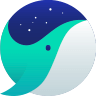
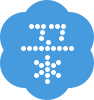

In [45]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

In [46]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

In [49]:
soup = BeautifulSoup(html, 'html.parser')
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [54]:
tags_span = soup.select('span')
print(tags_span)

[<span class="name"> 바나나 </span>, <span class="price"> 3000원 </span>, <span class="inventory"> 500개 </span>, <span class="store"> 가나다상회 </span>, <span class="name"> 파인애플 </span>]


In [55]:
tags_p = soup.select('p')
print(tags_p)

[<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>, <p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>]


In [56]:
ids_fruits1 = soup.select('#fruits1')
ids_fruits1

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [58]:
class_price = soup.select('.price')
class_price

[<span class="price"> 3000원 </span>]

In [60]:
tags_span_class_price = soup.select('span.price')
tags_span_class_price

[<span class="price"> 3000원 </span>]

In [61]:
tags_name = soup.select('span.name')
tags_name

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [63]:
tags_banana1 = soup.select('#fruits1 > span.name')
tags_banana1

[<span class="name"> 바나나 </span>]

In [64]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')

print(tags_banana2)
print(tags_banana3)

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [66]:
tags = soup.select('span.name')
tag_1 = tags[0]
tag_1

<span class="name"> 바나나 </span>

In [67]:
tags = soup.select('span.name')

for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [72]:
tags = soup.select('a')
tag = tags[0]

content = tag.text
print(content)
print(content.strip())

link = tag['href']
print(link)

 홈페이지 
홈페이지
http://bit.ly/forPlaywithData
